【問題1】100日目の米粒の数


100日目には合計で米粒をいくつもらっているのかを計算するコードを作成し、答えを出力してください。また、1日目から100日目までの「その日にもらう米の数」と「その日までに累計で貰う米の数」の推移を折れ線グラフで表現してください。（縦軸が米の数、横軸が日数）

In [ ]:
grain_of_rice = 1
grain_rice_list = [grain_of_rice] #日々貰う米粒のリスト
total_rice_list = [grain_rice_list[0]] #日々貰う米粒の総数のリスト
day = 100

for i in range(day-1):
  grain_rice_list.append(grain_rice_list[-1]*2)
  total_rice_list.append(total_rice_list[-1]+grain_rice_list[-1])


print('{}日目に合計で{}粒の米粒をもらっている'.format(day, total_rice_list[-1]))

100日目に合計で1267650600228229401496703205375粒の米粒をもらっている


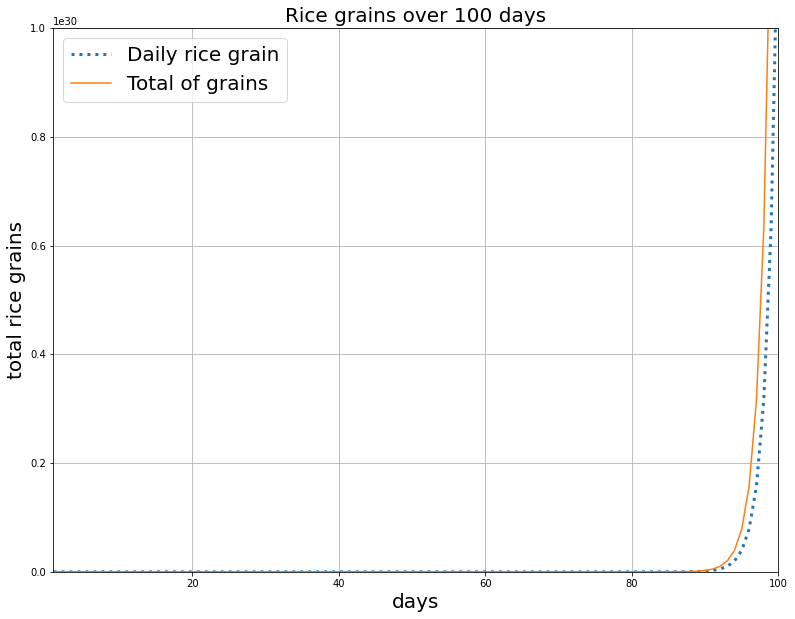

In [ ]:
# 折れ線グラフ

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(13, 10))
plt.title("Rice grains over 100 days", {'fontsize':20})
plt.xlabel("days", {'fontsize':20})
plt.ylabel("total rice grains", {'fontsize':20})
plt.xlim([1,100])
plt.ylim([1,10e+29])
plt.grid(True)
plt.plot(grain_rice_list, label = 'Daily rice grain', lw = '3', ls = ':')
plt.plot(total_rice_list, label = 'Total of grains')
plt.legend(fontsize = 20)
plt.show()

【問題2】100日目以外の米粒の数


この逸話は30日だったり81日だったりと日数が曖昧です。どの話にも対応できるように日数を引数とした 関数 を作成しましょう。関数を作成した上で、コースを受講する日数の間でいくつ米粒をもらえるかを答えてください。前の問題同様に折れ線グラフも出力してください。


以下の雛形には関数としての枠組みだけではなく、引数や返り値についてのコメントも記載してあります。参考にして、自分なりにも分かりやすくコメントを書き換えてください。



In [ ]:
def compute_sorori_shinzaemon(day = 100, grain_of_rice=1):
# grain_of_rice = 1
  grain_rice_list = [grain_of_rice]
  total_rice_list = [grain_rice_list[0]]


#day = 米を貰う日数 (default = 100)

#Return↓
#grain_rice_list : list = ある日貰う米粒
#total_rice_list : list = ある日まで貰った米粒の総数


  for i in range(day-1):
    grain_rice_list.append(grain_rice_list[-1]*2)
    total_rice_list.append(total_rice_list[-1] + grain_rice_list[-1])
  
  return grain_rice_list, total_rice_list

day = 120
grain_rice_list, total_rice_list = compute_sorori_shinzaemon(day=day)
print('{}日間でもらえる米粒の総数は{}粒'.format(day, total_rice_list[-1]))

120日間でもらえる米粒の総数は1329227995784915872903807060280344575粒


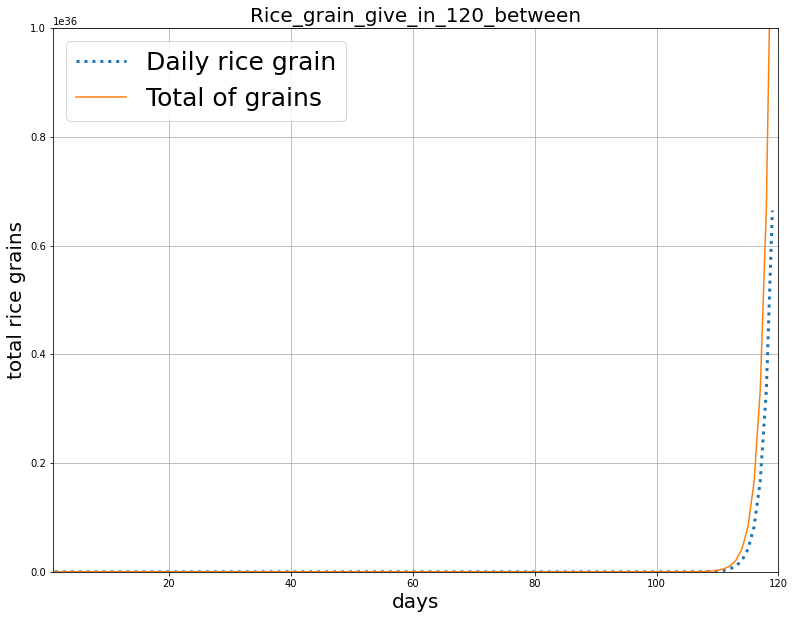

In [ ]:
#グラフ作成

plt.figure(figsize=(13, 10))
plt.title("Rice_grain_give_in_120_between", {'fontsize':20})
plt.xlabel("days", {'fontsize':20})
plt.ylabel("total rice grains", {'fontsize':20})
plt.xlim([1,120])
plt.ylim([1,10e+35])
plt.grid(True)
plt.plot(grain_rice_list, label = 'Daily rice grain', lw = '3', ls = ':')
plt.plot(total_rice_list, label = 'Total of grains')
plt.legend(fontsize = 25, loc = 'upper left')
plt.show()

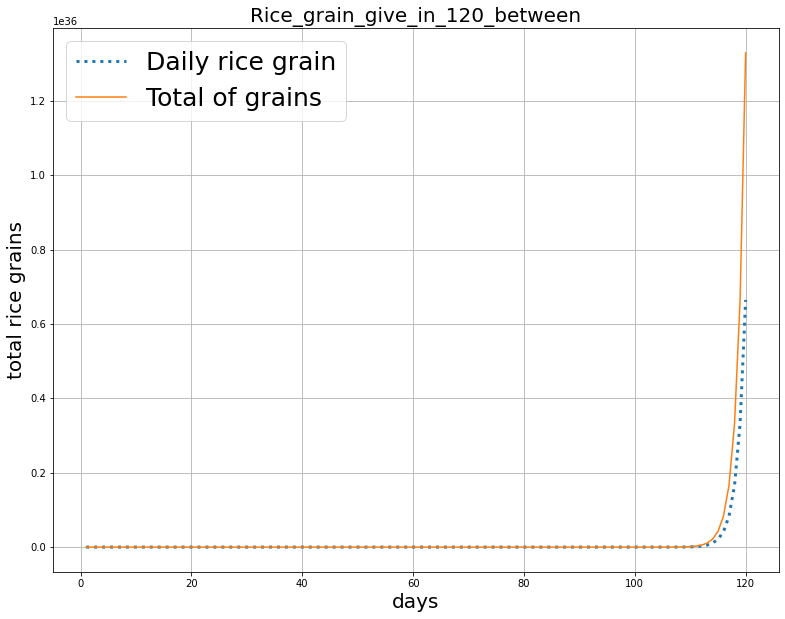

In [ ]:
#解答を見ながらグラフ再作成


plt.figure(figsize=(13, 10))
plt.title("Rice_grain_give_in_120_between", {'fontsize':20})
plt.xlabel("days", {'fontsize':20})
plt.ylabel("total rice grains", {'fontsize':20})
plt.grid(True)
plt.plot(range(1, day +1), grain_rice_list, label = 'Daily rice grain', lw = '3', ls = ':')
plt.plot(range(1, day + 1), total_rice_list, label = 'Total of grains')
plt.legend(fontsize = 25, loc = 'upper left')
plt.show()

【問題3】貰える米で何人が何日生活できるか


この米があれば何人が何日生活できるか計算する関数を作成してください。コースを受講する期間に貰える米粒で、このクラスにいる人数であれば、何日間生活できるかを出力してみましょう。



関数の最低限の入力は 米粒の数(int) と 人数(int) 、出力は 生活できる日数(int) です。関数名やコメントなどは分かりやすく考えて作成してください。



ここでは1日に必要な米粒の数は提示しません。自分なりに調べて、計算式に落とし込んでください。どう調べ、何を根拠にしたかもコメントを残しておいてください。

In [ ]:
#解答を見ながら写す

"""
まず米1粒のカロリーを計算する

（参考）
ご飯のカロリーの量はどのくらいあるのですか。：農林水産省
http://www.maff.go.jp/j/heya/sodan/1202/a02.html
> 精米（精白米）のご飯で100グラム当たり168キロカロリー

１合のお米を炊くと、何グラムになるのですか。 | タイガー魔法瓶 よくあるご質問
https://support.tiger.jp/faq/show/289?category_id=76&site_domain=faq
> お米は1合約150gです。それを炊飯すると、2.3倍の約345gになります。

炊いた後で100グラム168キロカロリーと分かる。炊いた後の100グラムは何粒？

お米Q＆A : お米1キログラムには何粒ぐらいお米が入っているのですか？ ／他- 米ネット
http://www.komenet.jp/faq/ip17.html
> お米（精米）1粒は約0.02g（中粒）です。
"""

# 炊いたご飯100グラムで168キロカロリー
# ご飯は炊くと2.3倍の重さになる
# 炊く前の米は1粒0.02g

# 米1粒のカロリー＝炊いた後100グラムのカロリー/炊いた後100グラムの米の数
# 炊いた後100グラムの米の数＝(100グラム/炊くと何倍になるか)/炊く前の米1粒の重さ

calories_of_rice = 168*1000/((100/2.3)/0.02)

print("1粒あたり{}カロリー".format(calories_of_rice))

def compute_how_many_days(n_grains, n_people, calories_of_rice=77.28 , calories_needed_per_day=2200*1000):
    """
    この米があれば何人が何日生活できるか計算する関数

    Parameteres
    --------------
    n_grains: int
        米の数
    n_people: int
        人数
    calories_of_rice: int
        米1粒のカロリー(default:77.28)        
    calories_needed_per_day: int
        1人が1日暮らすのに必要なカロリー (default : 2200*1000)
        （参考）一日に必要なエネルギー量と摂取の目安：農林水産省
        http://www.maff.go.jp/j/syokuiku/zissen_navi/balance/required.html

    Returns
    --------------
    days_to_live: int
        暮らせる日数
    """
    total_calories = n_grains*calories_of_rice
    total_calories_needed_per_day = n_people*calories_needed_per_day
    
    days = total_calories/total_calories_needed_per_day

    return days

day = 120
n_people = 12

_, list_total_grains = compute_sorori_shinzaemon(day=day) #この列の意味が分からない

days_to_live = compute_how_many_days(list_total_grains[-1], n_people) #この列の意味が分からない

print("{}人が{}日暮らせます。".format(n_people, days_to_live))
print("この時の米粒の数：{}".format(list_total_grains[-1]))

1粒あたり77.28カロリー
12人が3.891012860388572e+30日暮らせます。
この時の米粒の数：1329227995784915872903807060280344575
